In [1]:
from google.colab import files
files.upload()

Saving dataset.csv to dataset.csv


{'dataset.csv': b'Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,PE,P/B,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,2449,490,294,342,1.16,4.06,0.89,25.77,13.29,1.93,0.63,1.91,21.3,10.86,6.28,0.49\r\n3M India Ltd.,1087,138,93,106,1.14,31.55,4.65,23.55,35.88, -   ,2.08, -   ,14.17,8.31,17.49,2.32\r\nABB India Ltd.,6237,548,355,354,1,36.17,6.68,15.71,25.33, -   ,1.18,0.26,9.55,5.46,20.56,2.38\r\nAccelya Solutions India Ltd.,166,40,26,28,1.08,4.91,0.85,24.02,25.64,0.04,1.11,2.28,24.76,15.92,1.75,0.57\r\nAegis Logistics Ltd.,305,72,43,33,0.76,9.2,1.55,24.55,22.5,0.69,0.83,2.62,25.93,14.09,5.48,0.92\r\nAffle (India) Ltd.,6,0,0,#N/A,#N/A, -   , -   , -   ,1.95,-0.06,0.97, -   ,3.78,1.17, -   , -   \r\nAgro Tech Foods Ltd.,650,26,25,14,0.56,23.97,3.85,17.92,23.85, -   ,2.64,0.61,5.62,3.87,15.28,0.65\r\nAkzo Nobel India Ltd.,939,116,159,111,0.7,7.06,2.16,16.25,20.52, -   ,0.82,2.66,19.96,14.3,10.1

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
data = pd.read_csv('dataset.csv')

In [196]:
data.head()

,Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,PE,P/B,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,2449,490,294,342,1.16,4.06,0.89,25.77,13.29,1.93,0.63,1.91,21.30,10.86,6.28,0.49
1,3M India Ltd.,1087,138,93,106,1.14,31.55,4.65,23.55,35.88,-,2.08,-,14.17,8.31,17.49,2.32
2,ABB India Ltd.,6237,548,355,354,1,36.17,6.68,15.71,25.33,-,1.18,0.26,9.55,5.46,20.56,2.38
3,Accelya Solutions India Ltd.,166,40,26,28,1.08,4.91,0.85,24.02,25.64,0.04,1.11,2.28,24.76,15.92,1.75,0.57
4,Aegis Logistics Ltd.,305,72,43,33,0.76,9.2,1.55,24.55,22.50,0.69,0.83,2.62,25.93,14.09,5.48,0.92


In [197]:
test = data.iloc[:,:]

In [198]:
data = data.replace( ' -   ', np.nan)


In [199]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [200]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [201]:
data.fillna(data.mean(), inplace=True)

# **Ev/EBITDA Prediction**

In [202]:
data1 = data.iloc[:,:16 ]

In [203]:
data1.head()


,Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,PE,P/B,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA
0,3I Infotech Ltd.,2449.0,490.0,294.0,342.0,1.16,4.06,0.89,25.77,13.29,1.930000,0.63,1.91000,21.30,10.86,6.28
1,3M India Ltd.,1087.0,138.0,93.0,106.0,1.14,31.55,4.65,23.55,35.88,0.283302,2.08,1.92618,14.17,8.31,17.49
2,ABB India Ltd.,6237.0,548.0,355.0,354.0,1.00,36.17,6.68,15.71,25.33,0.283302,1.18,0.26000,9.55,5.46,20.56
3,Accelya Solutions India Ltd.,166.0,40.0,26.0,28.0,1.08,4.91,0.85,24.02,25.64,0.040000,1.11,2.28000,24.76,15.92,1.75
4,Aegis Logistics Ltd.,305.0,72.0,43.0,33.0,0.76,9.20,1.55,24.55,22.50,0.690000,0.83,2.62000,25.93,14.09,5.48


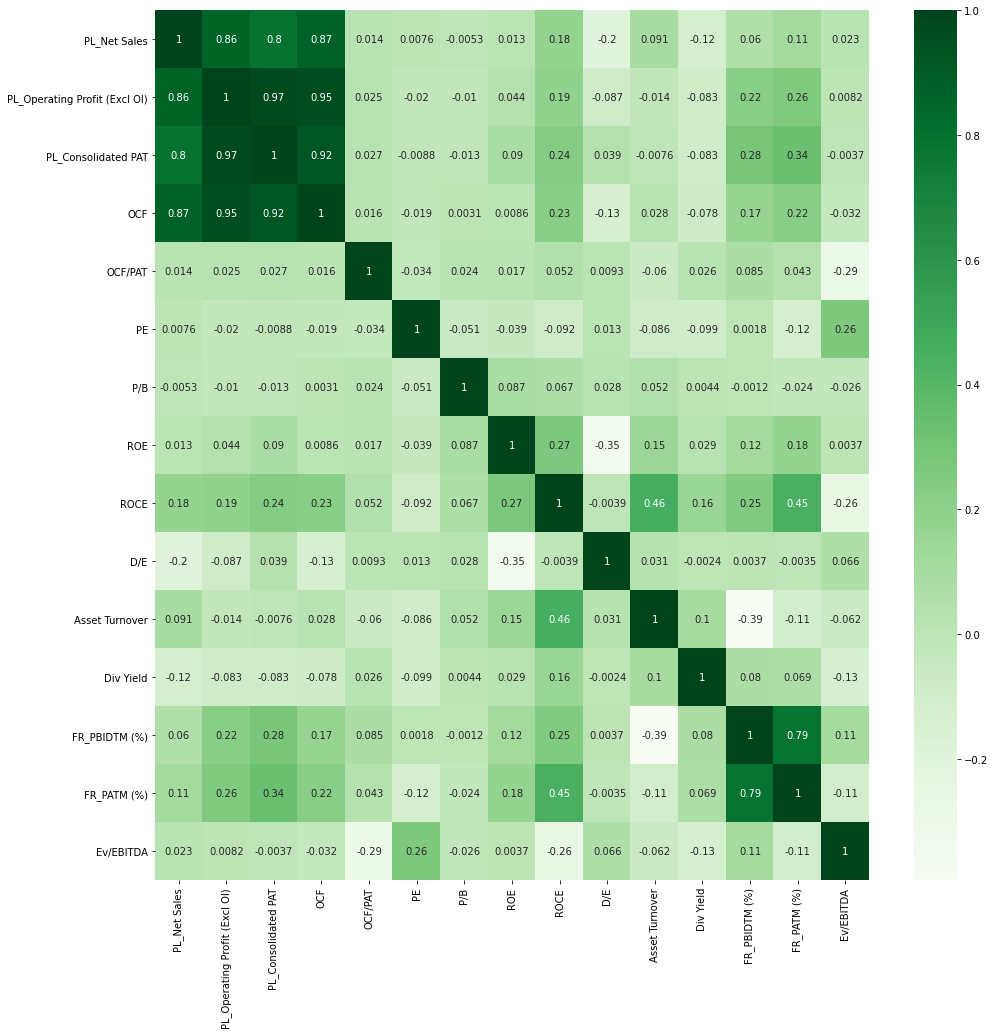

In [204]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [205]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.1]
relevant_features.index

Index(['OCF/PAT', 'PE', 'ROCE', 'Div Yield', 'FR_PBIDTM (%)', 'FR_PATM (%)',
       'Ev/EBITDA'],
      dtype='object')

In [206]:
X,y = data1[['OCF/PAT', 'PE', 'ROCE', 'Div Yield', 'FR_PBIDTM (%)', 'FR_PATM (%)']], data1['Ev/EBITDA']

In [207]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [209]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
reg1 = LassoCV(cv=10, random_state=0).fit(X_train, y_train)
reg2 =  xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500)
reg3 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)

In [228]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test.values, pred3))

9.225287939840891


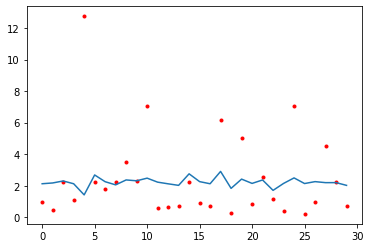

In [229]:
plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(y_test))], pred1)


In [212]:
#data1['PE'].plot.kde()

# **M/Sales Prediction**

In [213]:
data2 = data.iloc[:,:17 ].drop('Ev/EBITDA', axis=1)

In [214]:
data2.head()

,Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,PE,P/B,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),M/Sales
0,3I Infotech Ltd.,2449.0,490.0,294.0,342.0,1.16,4.06,0.89,25.77,13.29,1.930000,0.63,1.91000,21.30,10.86,0.49
1,3M India Ltd.,1087.0,138.0,93.0,106.0,1.14,31.55,4.65,23.55,35.88,0.283302,2.08,1.92618,14.17,8.31,2.32
2,ABB India Ltd.,6237.0,548.0,355.0,354.0,1.00,36.17,6.68,15.71,25.33,0.283302,1.18,0.26000,9.55,5.46,2.38
3,Accelya Solutions India Ltd.,166.0,40.0,26.0,28.0,1.08,4.91,0.85,24.02,25.64,0.040000,1.11,2.28000,24.76,15.92,0.57
4,Aegis Logistics Ltd.,305.0,72.0,43.0,33.0,0.76,9.20,1.55,24.55,22.50,0.690000,0.83,2.62000,25.93,14.09,0.92


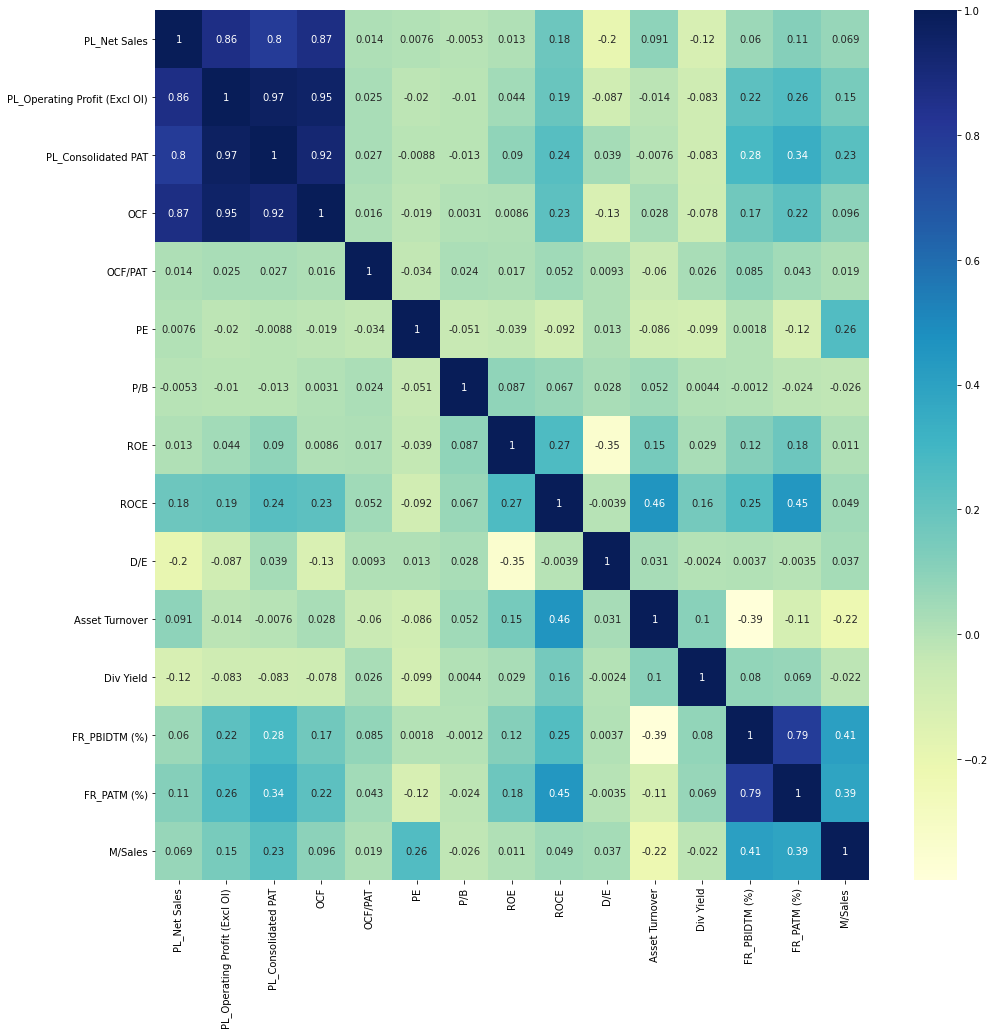

In [215]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [216]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>0.2]
relevant_features.index

Index(['PL_Consolidated PAT', 'PE', 'Asset Turnover', 'FR_PBIDTM (%)',
       'FR_PATM (%)', 'M/Sales'],
      dtype='object')

In [217]:
X,y = data2[['PL_Consolidated PAT', 'PE', 'Asset Turnover', 'FR_PBIDTM (%)',
       'FR_PATM (%)']], data2['M/Sales']

In [218]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [220]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
reg1 = LassoCV(cv=10, random_state=0).fit(X_train, y_train)
reg2 =  xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500)
reg3 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)

In [231]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test.values, pred1))

7.49869991893818


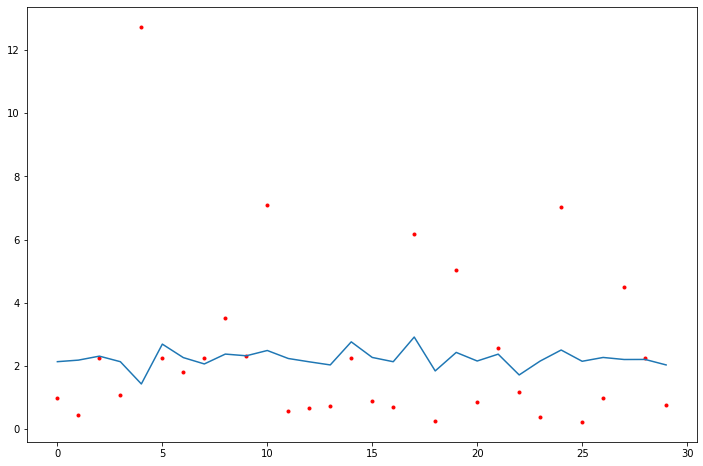

In [237]:
plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred2))], pred1)
